Sample SuperStor Project

In [66]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cree un análisis exhaustivo de los datos de ventas minoristas utilizando Python, centrándose en la limpieza
# de datos, el análisis estadístico básico y la creación de visualizaciones claras. Este proyecto demostrará las habilidades fundamentales de ciencia de datos que todo analista necesita.
df = pd.read_excel('/content/Sample-Superstore.xls')
df.set_index('Row ID', inplace=True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2014-11-09,2014-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2014-11-09,2014-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2013-138688,2014-06-13,2014-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2012-108966,2013-10-11,2013-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2013-10-11,2013-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [67]:
print(df.shape)
df['Ship Mode'].value_counts()
# Ship Mode' indica el método de envío utilizado.
# 'Segment' clasifica al cliente, como 'Consumer' o 'Corporate'.
# 'Country' y 'Region' muestran el país y la región en la que se realizó la venta.
# 'Sales' muestra el monto de la venta en dólares.
# Finalmente, 'Profit' es la ganancia obtenida por esa venta.
# Ship Date Fecha de envío
# Order Date Fecha del pedido

(9994, 20)


,count
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


### Learning Objectives
- Data cleaning and preprocessing
- Basic exploratory data analysis (EDA)
- Creating meaningful visualizations
- Writing clear analytical conclusions
- Limpieza y preprocesamiento de datos.
- Análisis exploratorio básico de datos (EDA).
- Creación de visualizaciones significativas.
- Redacción de conclusiones analíticas claras.

### Requirements
1. Clean and prepare the dataset
   - Handle missing values
   - Fix data types
   - Remove duplicates
   - Gestionar los valores perdidos.
   - Corregir los tipos de datos.
   - Eliminar duplicados.

   
2. Perform basic analysis
   - Calculate monthly sales totals
   - Identify top-selling products
   - Determine peak sales periods

   - Calcular los totales de ventas mensuales.
   - Identificar los productos más vendidos.
   - Determinar los períodos de máxima venta.

3. Create visualizations
   - Line plot of sales over time
   - Bar chart of top 10 products
   - Pie chart of sales by category

    Gráfico lineal de ventas a lo largo del tiempo.
    Gráfico de barras de los 10 productos más vendidos.
    Gráfico circular de ventas por categoría.
   
4. Write a brief report (300-500 words)
   - Summarize key findings
   - Explain methodology
   - Suggest business recommendations
    Resumir las conclusiones clave.
    Explicar la metodología.
    Sugerir recomendaciones empresariales.

In [204]:
# limpieza de Datos
# print(df.isnull().sum())
# print(df.duplicated().sum())
# print(df[df.duplicated() == True])
df = df.drop_duplicates()
# print(df.duplicated().sum())
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2014-11-09,2014-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2014
2,CA-2013-152156,2014-11-09,2014-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2014
3,CA-2013-138688,2014-06-13,2014-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2014
4,US-2012-108966,2013-10-11,2013-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2013
5,US-2012-108966,2013-10-11,2013-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2013


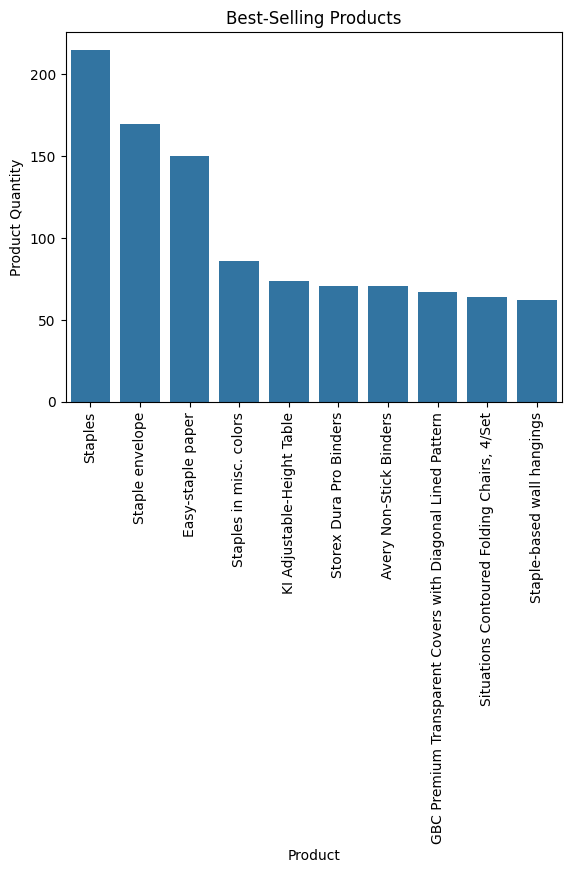

In [213]:
# Identificar los productos más vendidos.
best_selling_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
best_selling_products

sns.barplot(x=best_selling_products.index, y=best_selling_products.values)
plt.title('Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Product Quantity')
plt.xticks(rotation=90)
plt.show()

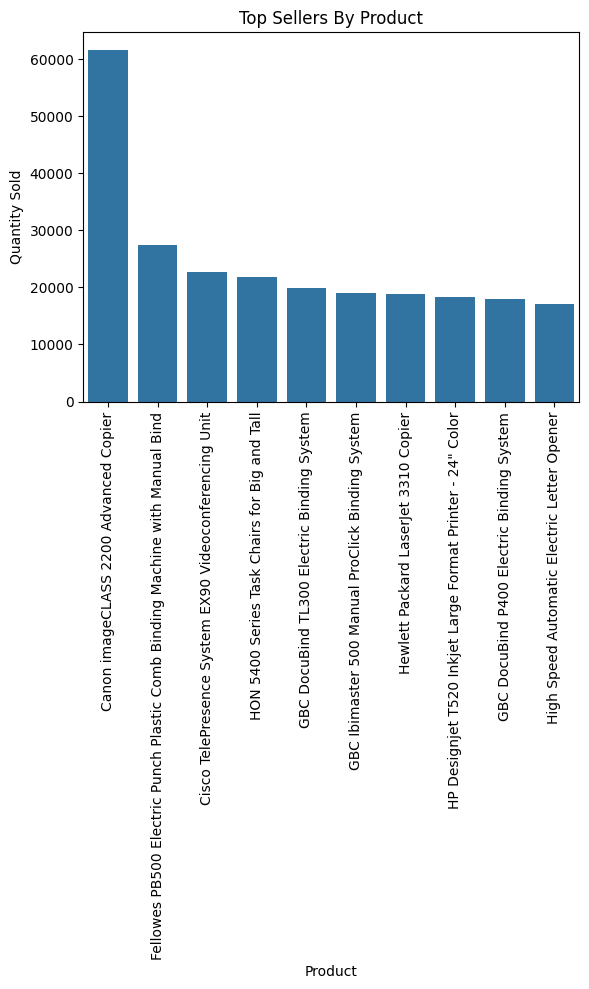

In [214]:
# top sellers by product
best_sales_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=best_sales_products.index, y=best_sales_products.values)
plt.title('Top Sellers By Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.show()

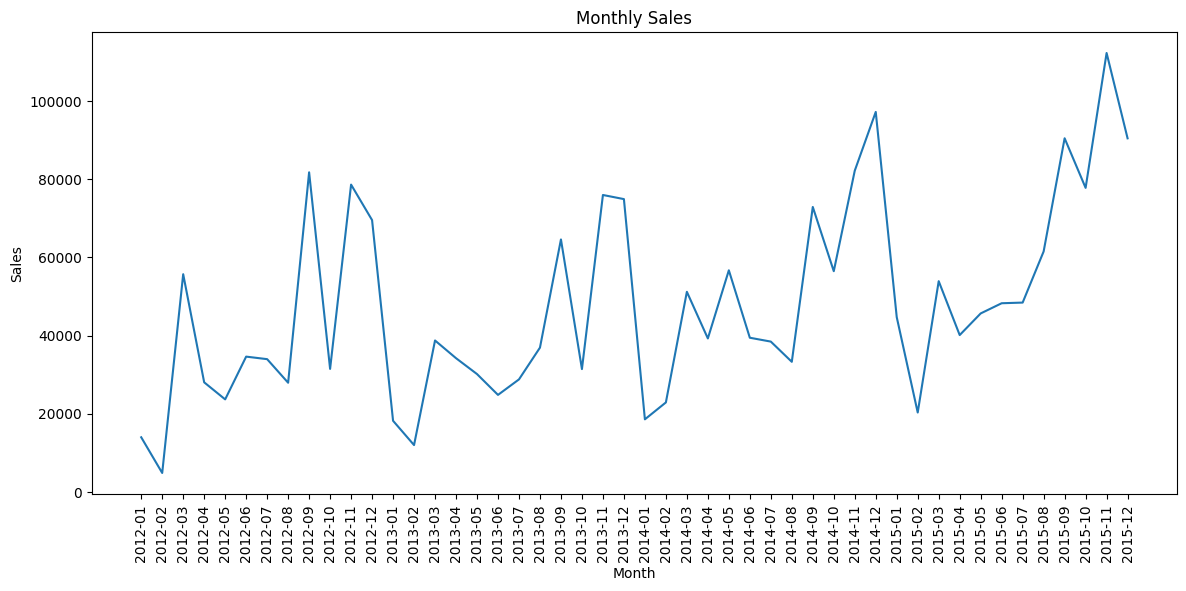

In [215]:
# Calculate monthly sales totals
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [208]:
# Determinar los períodos de máxima venta.
monthly_sales.sort_values(ascending=False)

,Sales
Order Date,
2015-11,112326.4710
2014-12,97237.4170
2015-09,90488.7220
2015-12,90474.6008
2014-11,82192.3228
2012-09,81777.3508
2012-11,78628.7167
2015-10,77793.7552
2013-11,75972.5635


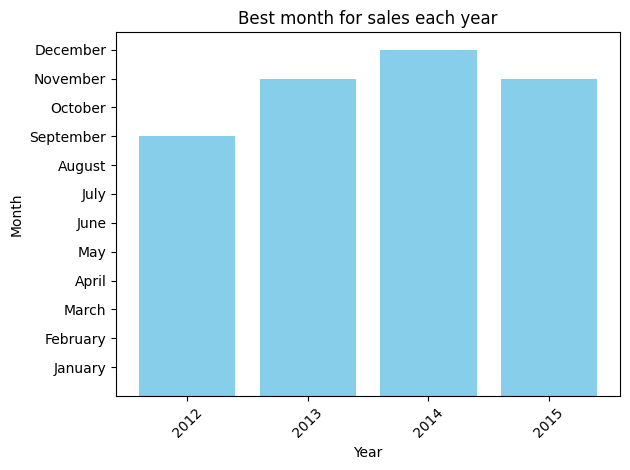

In [230]:
# best month for sales each year
import calendar

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

best_sales = df.groupby(['Year', 'Month'])['Sales'].sum()
# necesito el mejor mes por ventas de cada año
best_sales_m_y = best_sales.groupby('Year').idxmax()

years = best_sales_m_y.index
month_numbers = [item[1] for item in best_sales_m_y]
month_names_en = [calendar.month_name[i] for i in range(1, 13)]

plt.bar(x=years.astype(str), height=month_numbers, color='skyblue')
plt.title('Best month for sales each year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(ticks=range(1, 13), labels=month_names_en)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


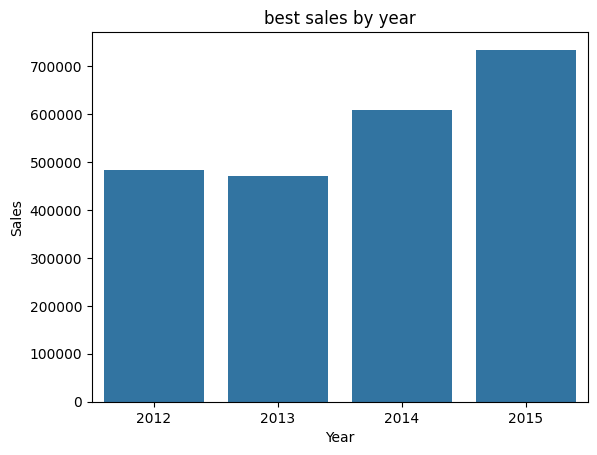

In [217]:
# best sales by year

best_sales_year = df.groupby('Year')['Sales'].sum()
best_sales_year
sns.barplot(x=best_sales_year.index, y=best_sales_year.values)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('best sales by year')
plt.show()

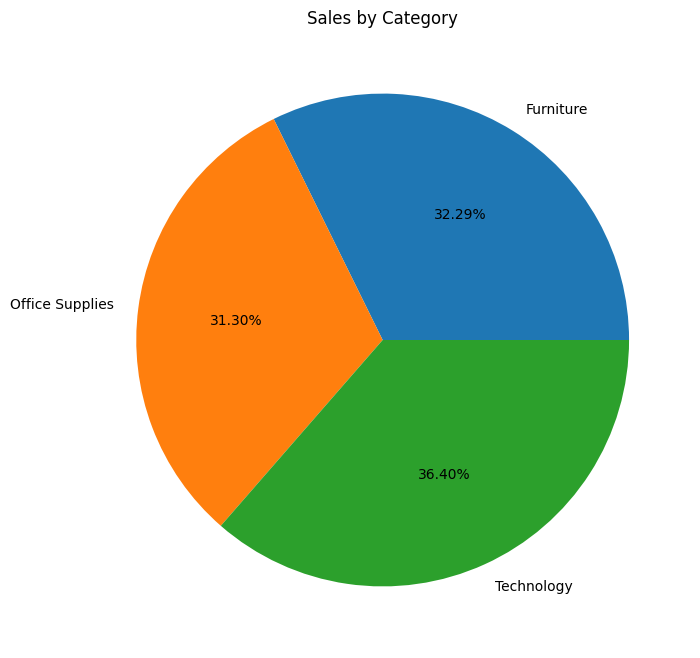

In [223]:
# Pie chart of sales by category
sales_by_category = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_category.values, labels=sales_by_category.index, autopct='%1.2f%%')
plt.title('Sales by Category')
plt.show()